<a href="https://colab.research.google.com/github/CSC345DSLoveYou/HousePrice_DSLoveyou/blob/master/HousePricePredictionOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import linear_model


In [ ]:
print(pd.__version__)

1.1.4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfTrain = pd.read_csv("/content/drive/Shared drives/CSC345-DS-Project/house-prices-advanced-regression-techniques/train.csv"
        , sep = ",")
print('%i subjects and %i columns' % dfTrain.shape)
dfTrain.head()

1460 subjects and 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train,test = train_test_split(dfTrain,test_size=0.25)

In [ ]:
print(train.shape[0])

1095


In [ ]:
print(test.shape[0])

365


In [ ]:
dfTest = pd.read_csv("/content/drive/Shared drives/CSC345-DS-Project/house-prices-advanced-regression-techniques/test.csv"
        , sep = ",")

In [ ]:
print(dfTrain.corr())

                     Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
Id             1.000000    0.011156    -0.010601  ...  0.021172  0.000712  -0.021917
MSSubClass     0.011156    1.000000    -0.386347  ... -0.013585 -0.021407  -0.084284
LotFrontage   -0.010601   -0.386347     1.000000  ...  0.011200  0.007450   0.351799
LotArea       -0.033226   -0.139781     0.426095  ...  0.001205 -0.014261   0.263843
OverallQual   -0.028365    0.032628     0.251646  ...  0.070815 -0.027347   0.790982
OverallCond    0.012609   -0.059316    -0.059213  ... -0.003511  0.043950  -0.077856
YearBuilt     -0.012713    0.027850     0.123349  ...  0.012398 -0.013618   0.522897
YearRemodAdd  -0.021998    0.040581     0.088866  ...  0.021490  0.035743   0.507101
MasVnrArea    -0.050298    0.022936     0.193458  ... -0.005965 -0.008201   0.477493
BsmtFinSF1    -0.005024   -0.069836     0.233633  ... -0.015727  0.014359   0.386420
BsmtFinSF2    -0.005968   -0.065649     0.049900  ... -0.015211  

In [ ]:
dfTest.fillna(0,inplace=True)
print('%i subjects and %i columns' % dfTest.shape)
dfTest.head(30)

1459 subjects and 80 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,MnPrv,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,0,0,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,MnPrv,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,0,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,0,0,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,0,0,0,0,4,2010,WD,Normal
6,1467,20,RL,0.0,7980,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,0,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,0,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,0,0,0,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,0,0,0,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,804.0,Rec,78.0,0.0,88

In [ ]:
dfTrain.fillna(0,inplace=True)
print('%i subjects and %i columns' % dfTrain.shape)
dfTrain.head(30)

1460 subjects and 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,0,0,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,...,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,R

In [ ]:
correlation_matrix = dfTrain.drop(["Id"], axis=1).corr()


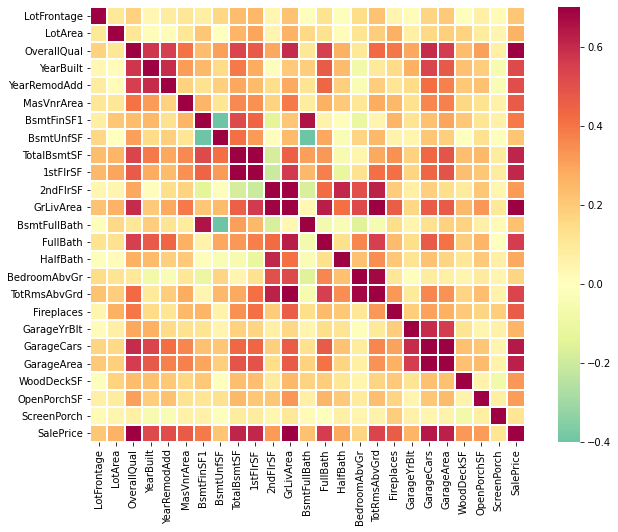

In [ ]:
# Let us find out the variable names that have high correlation with SalePrice
# We call these variables important variables.

variables = correlation_matrix.columns
important_variables = []
for row in variables:
    corrl = correlation_matrix.loc[row, 'SalePrice']
    if corrl > 0.1:
        important_variables.append(row)

hp = correlation_matrix.loc[important_variables, important_variables]
plt.figure("Heatmap-Important Variables", figsize=(12,8))
# sns.heatmap(hp, annot=True, cbar=True)

sns.heatmap(hp, cmap='Spectral_r', square=True, vmin=-.4, vmax=.7, linewidths=1,center= 0)

In [ ]:
print('%i subjects and %i columns' % train.shape)
train.head(30)

1095 subjects and 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
264,265,30,RM,30.0,5232,Pave,Grvl,IR3,Bnk,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1925,2004,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,680,680,GasA,...,N,FuseP,764,0,0,764,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1965.0,Unf,2,504,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,73000
807,808,70,RL,144.0,21384,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,2Story,5,6,1923,2004,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Gd,GLQ,1309,Unf,0,15,1324,GasA,...,Y,SBrkr,1072,504,0,1576,2,0,1,1,3,1,Gd,6,Typ,1,TA,Attchd,1923.0,RFn,2,528,TA,TA,Y,0,312,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,223500
373,374,20,RL,79.0,10634,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,BLQ,428,LwQ,180,0,608,GasA,...,Y,SBrkr,1319,0,0,1319,1,0,1,0,3,1,TA,5,Min2,0,NaN,Attchd,1953.0,Unf,1,270,TA,TA,Y,66,0,0,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Normal,123000
653,654,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,7,1906,1995,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,756,756,GasA,...,Y,SBrkr,756,713,0,1469,0,0,1,0,3,1,TA,7,Typ,0,NaN,Detchd,1906.0,Unf,1,216,TA,TA,Y,57,0,239,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,135000
327,328,20,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,175.0,TA,TA,CBlock,TA,TA,No,Rec,565,Unf,0,818,1383,GasA,...,Y,SBrkr,1383,0,0,1383,0,0,1,1,3,1,TA,7,Typ,0,NaN,Attchd,1960.0,RFn,1,292,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,145250
1118,1119,80,RL,85.0,13825,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,5,6,1958,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,533,533,GasA,...,Y,SBrkr,1021,580,0,1601,0,1,1,0,3,1,TA,6,Min2,0,NaN,BuiltIn,1958.0,RFn,1,300,TA,TA,Y,280,34,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,140000
218,219,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,9,1939,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,No,BLQ,341,Unf,0,457,798,GasA,...,Y,SBrkr,1137,817,0,1954,0,1,1,1,3,1,Gd,8,Typ,2,TA,Attchd,1939.0,Unf,2,431,TA,TA,Y,0,119,150,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,311500
850,851,120,RM,36.0,4435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,170.0,Gd,TA,PConc,Gd,TA,Av,GLQ,659,Unf,0,189,848,GasA,...,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,0,NaN,Attchd,2003.0,Fin,2,420,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,131500
734,735,20,RL,NaN,8978,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1968,1968,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,948,948,GasA,...,Y,SBrkr,948,0,0,948,0,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1968.0,Unf,1,300,TA,TA,Y,147,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Family,108000
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,5,1939,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,Rec,204,Unf,0,35

In [ ]:
reg = LinearRegression()

In [ ]:
col =['OverallQual','GrLivArea','GarageCars']

In [ ]:
reg.fit(train[col],train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg.predict(test[col])

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,test['SalePrice']))

1934682719.650609


In [ ]:
result=reg.predict(dfTest[col])

In [ ]:
print(result)

[103139.91207762 152114.63548786 163175.76617997 ... 141513.17363415
  86268.77941842 255477.94698856]


In [ ]:
submission = pd.DataFrame({'Id':dfTest['Id'],'SalePrice':result})

In [ ]:
print(submission)

        Id      SalePrice
0     1461  103139.912078
1     1462  152114.635488
2     1463  163175.766180
3     1464  187653.039254
4     1465  221951.905508
...    ...            ...
1454  2915   66979.830978
1455  2916   87809.066967
1456  2917  141513.173634
1457  2918   86268.779418
1458  2919  255477.946989

[1459 rows x 2 columns]


In [ ]:
submission.to_csv('/content/drive/Shared drives/CSC345-DS-Project/output/line_reg04.csv',index=False)